(lecture05:homework)=
# Homework 5

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

+ The total homework points are 100. Please note that the problems are not weighed equally.

```{note}
+ Please match all the pages corresponding to each of the questions when you submit on gradescope.
```

## Student details

+ **First Name: Pranay**
+ **Last Name: Gohel**
+ **Email: gohelp@purdue.edu**

Again, let me set you up with some code for plotting:

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', 'svg')

/tmp/ipython-input-367591302.py:8: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina', 'svg')


## Problem 1 - Analysis of experimental srtess-strain curves of alluminum 6061-T651

You are going to analyze the dataset collected by {cite}`AAKASH2019104085`.
They perform two types of experiments.
We are going to focus on the "uniaxial tension experiment."
This is what it is all about:
+ They took several speciments of alluminum 6061-T651 ([a high-temperature alluminum alloy](https://en.wikipedia.org/wiki/6061_aluminium_alloy)).
+ The shape of these speciments is like this:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr1_lrg.jpg
---
height: 300px
name: directive-fig
---
Geometry of the uniaxial tension specimen.
```
+ They mounted the speciment (using the holes you see on the sides) on a machine that applies tension:

```{figure} https://ars.els-cdn.com/content/image/1-s2.0-S2352340919304391-gr5_lrg.jpg
---
height: 300px
name: directive-fig2
---
The mounted specimen.
```
+ They controlled the temperature of the specimen.
+ They applied tension gradually until the speciment broke, recorging at each step the strain (% change in length) and the stress (force per cross section area in MPa - megaPascal).

I suggest that you skim through the paper if you want to understand more about the details of the experiment.
Measuring the strains and stresses is not as straightforward as it sounds...

Our goal is to download the data, and for a fixed temperature, create a model for the stress-strain relation.
We are going to do some of the low level stuff.
But, I am going to guide you through this.

+ First, download the complete zipped data from [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) and unzip it in the directory of your Jupyter notebook.
You have two options. Either do it mannually as we did in {ref}`lecture03:homework` or run the code segment below to do it from this Jupyter notebook:

In [2]:
# follow redirects (-L), use server's filename (-J), and write to that name (-O)
!curl -L -J -O 'https://data.mendeley.com/public-files/datasets/rd6jm9tyb6/files/559cd828-c044-418a-837c-35ce161c02ab/file_downloaded'

# sanity check: is it actually a zip?
!ls -lh
!file ./*

# unzip whatever came down (often there’s exactly one .zip)
!unzip -o *.zip

# if there are nested zips, expand them too
!unzip -o "*.zip"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   134  100   134    0     0    395      0 --:--:-- --:--:-- --:--:--   395
100 2230k  100 2230k    0     0  3295k      0 --:--:-- --:--:-- --:--:-- 3295k
total 2.2M
drwxr-xr-x 1 root root 4.0K Jan 16 14:24 sample_data
-rw-r--r-- 1 root root 2.2M Feb 20 15:18 stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip
./sample_data:                                                                                                          directory
./stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip: Zip archive data, at least v2.0 to extract, compression method=deflate
Archive:  stress-strain-curves-of-aluminum-6061-t651-from-9-lots-at-6-temperatures-under-uniaxial-and-plain-strain-tension.zip
  inflating: P

+ Now read the data description [here](https://data.mendeley.com/datasets/rd6jm9tyb6/2) very carefully and find a filename that contains data from a uniaxial tension test of 200 degrees C. There multiple files that fit this description. Just pick one of them.

In [5]:
filename = "T_200_A_1_094_041_14.csv"
print('The file I picked is: ', filename)

The file I picked is:  T_200_A_1_094_041_14.csv


+ Load the file in a dataframe and print it.

In [6]:
import pandas as pd
data = pd.read_csv(filename)
data

,Strain,Stress_MPa
0,0.000070,-0.950199
1,0.000044,0.160190
2,0.000030,1.854753
3,0.000023,3.719668
4,0.000017,6.722914
...,...,...
395,0.198670,27.497394
396,0.198973,26.058133
397,0.199312,24.618516
398,0.199640,23.108119


+ Plot the stress as a function of the strain. Please label your axes properly.

Text(0, 0.5, 'Stress (MPa)')

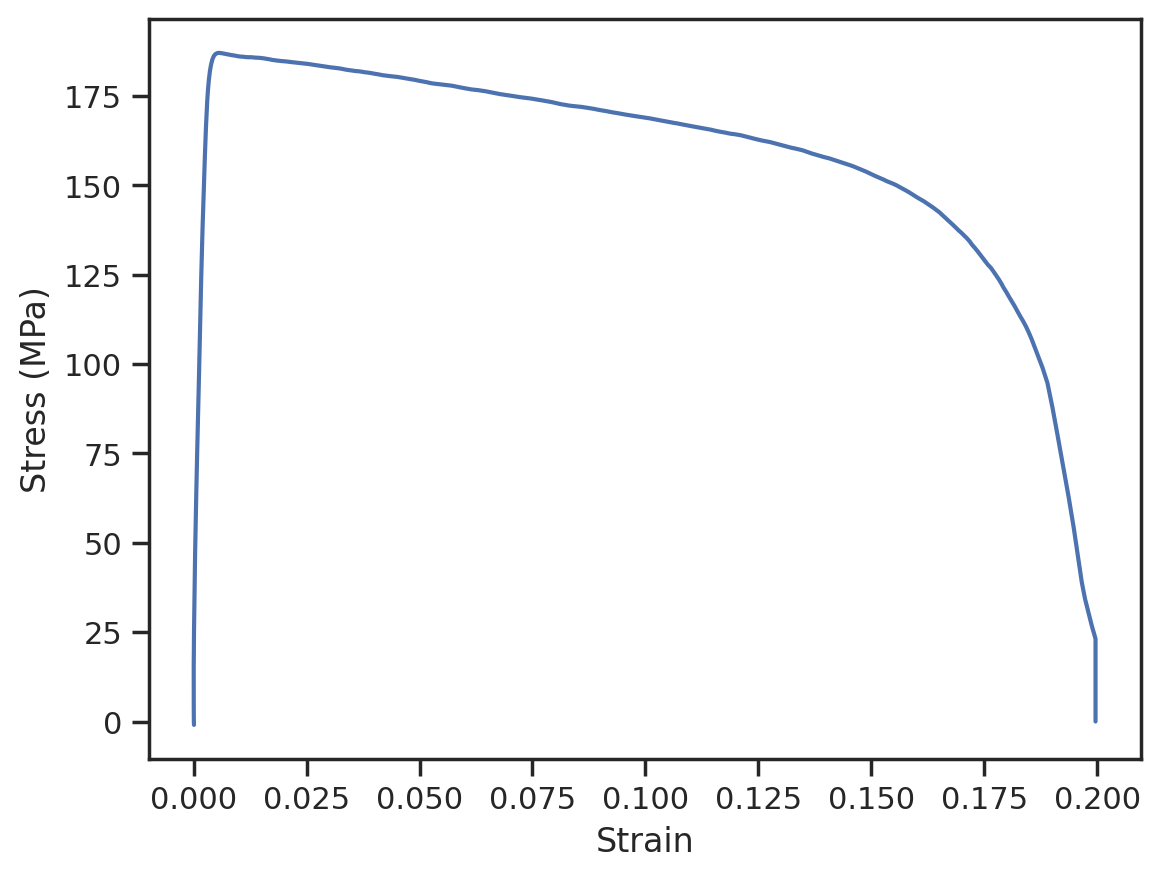

In [9]:
import matplotlib.pyplot as plt
plt.plot(data['Strain'], data['Stress_MPa'])
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

+ The [ultimate tensile strength](https://en.wikipedia.org/wiki/Ultimate_tensile_strength) (or just "the strength") of a material is the maximum stress that develops under tension before the material breaks. What is the strength of this alluminum alloy? Please, provide your answer below using the `print()` function with a precision of 2 decimal points. How does your answer compare with the strength range for allumunum alloys reported in [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy)?

In [12]:
ultimate_tensile_stength = data['Stress_MPa'].max()
print(f"The ultimate tensile strength of this aluminum alloy according to the data is {ultimate_tensile_stength:.2f} MPa. This is within the 124–290 MPa found on the linked Wikipedia page.")

The ultimate tensile strength of this aluminum alloy according to the data is 187.06 MPa. This is within the 124–290 MPa found on the linked Wikipedia page.


+ Let's zoom in to low strains. Plot the first 200 observations points of the stress-strain curve.

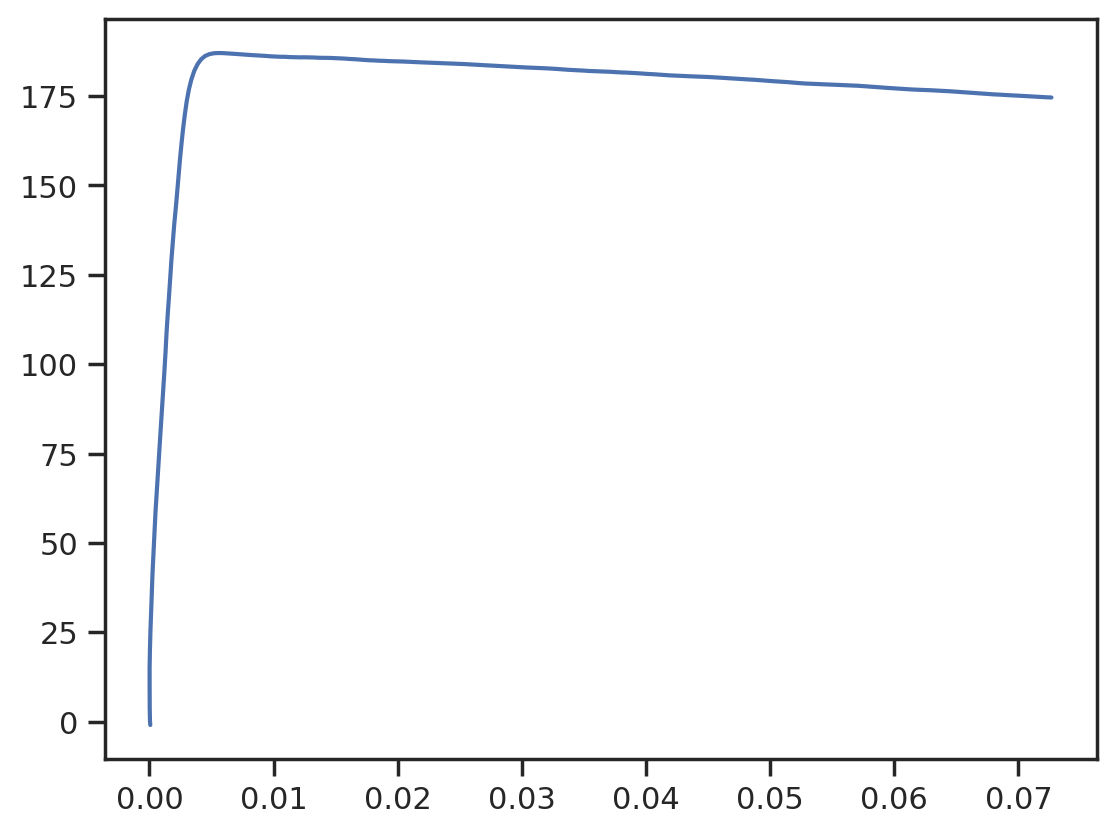

In [13]:
plt.plot(data['Strain'][:200], data['Stress_MPa'][:200])

+ Observe that the experimental data are behaving strangely at very small strains. As a matter of fact, we are getting a few negative strains at the beginning.
Let's throw these observartions away. Start by finding the index $i$ for which `df['Strain'][i]` becomes positive for the first time. You can do this by a visual inspection of `df['Strain'][:30]`.

In [14]:
data['Strain'][:30]

,Strain
0,0.000070
1,0.000044
2,0.000030
3,0.000023
4,0.000017
5,0.000016
6,0.000014
7,0.000041
8,0.000081
9,0.000134


+ Make a new dataframe, call it `clean_df` where you have thrown away the initial data. Then plot the first 200 observations of `clean_df`.

Upon visual inspection of the above first 30 Strain values, there are no negative values and hence the initial data does not need to be thrown away. The cleaned data will be the same.


Text(0, 0.5, 'Stress (MPa)')

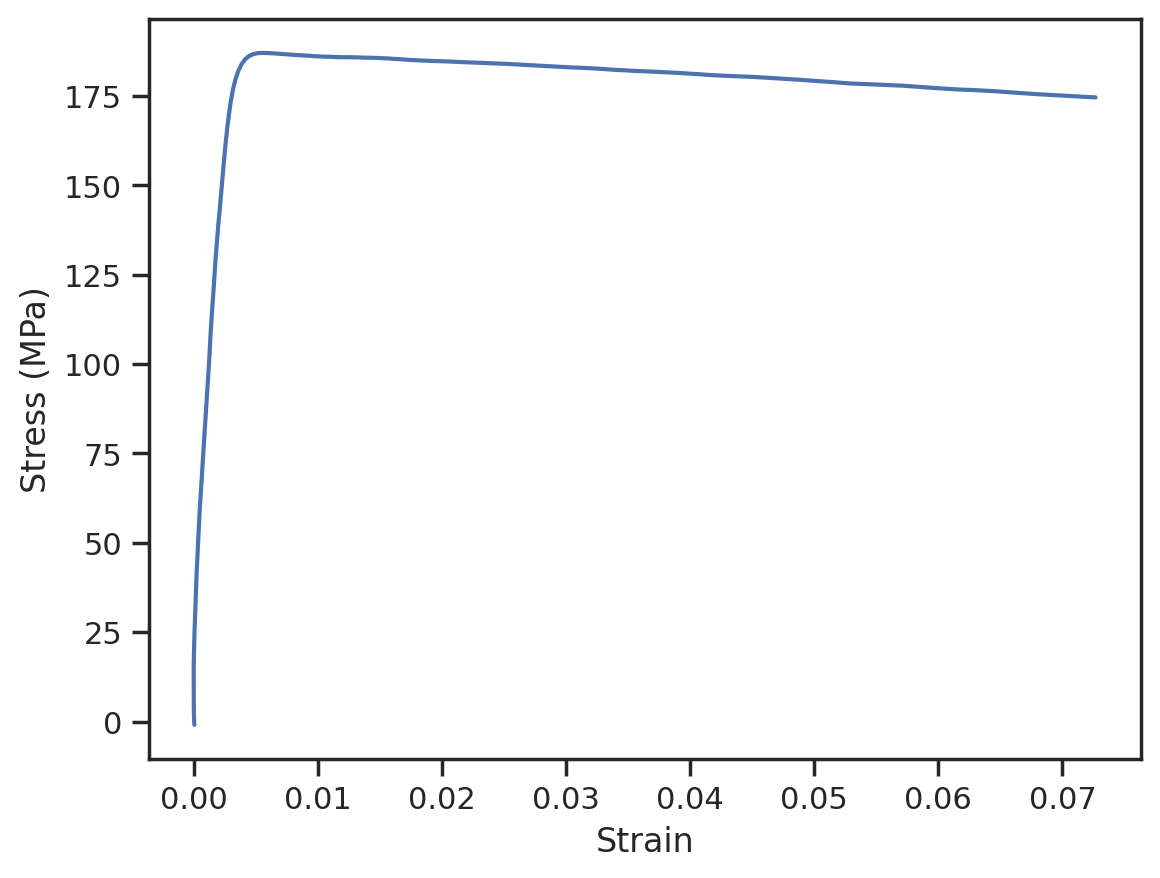

In [15]:
print("Upon visual inspection of the above first 30 Strain values, there are no negative values and hence the initial data does not need to be thrown away. The cleaned data will be the same.")
clean_df = data
plt.plot(clean_df['Strain'][:200], clean_df['Stress_MPa'][:200])
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')

+ Observe that initially the stress-strain relation is linear. This is the so-called *elastic regime*.
If you deform the material within this regime, it will return to its undeformed state without any permanent deformation effects.
If you deform the material beyond the elastic regime, then you start having what we call *plasticity*.
We are now going to focus exclusively on the linear regime.
Find an index $j$ so that `clean_df[:j]` is fully within the linear regime.
Make a new dataframe, say `linear_df` containing only these data.
You should probably pick $j$ by visual inspection.
And it is not important to pick the maximum $j$ with this property.
Just find one.

In [18]:
j = 38 # linear index from visual inspection
linear_df = data[:j]

+ In the elastic regime, the stress $\sigma$ is a linear function of the strain $\epsilon$:

$$
\sigma = E\epsilon.
$$

The constant $E$ is called Young's modulus and it has units of GPa (GigaPascal).
Make a function `sigma(epsilon, E)` that calculates the stress given the strain for any Young's modulus. Properly document the docstring of your function.

In [20]:
def sigma(epsilon, E):
  """
  Calculate the stress when given the strain for any Young's modulus.
  Arguments: epsilon (strain), Young's Modulus (E)
  Returns: stress (Sigma)
  """
  return(epsilon * E)

In [21]:
# Try your function here:
sigma(linear_df['Strain'], 68)

,Strain
0,0.004753
1,0.002990
2,0.002046
3,0.001597
4,0.001180
5,0.001071
6,0.000956
7,0.002756
8,0.005509
9,0.009110


+ If you pay close attention to the data in `linear_df` they do not cross zero.
This is due to a systematic bias in the experiment.
However, this bias is not important for calibrating Young's modulus $E$.
Only the slope of the curve is important for finding $E$.
So, let's make yet another dataframe (I promise you this is the last one) called `clean_linear_df` which removes this systematic bias.
The dataframe `clean_linear_df` should contain the same data as `linear_df` but
    + The strains should all be shifted by the minimum strain in `linear_df`. In other words, subtract from the strains in `clean_linear_df` the smallest strain in `linear_df`, i.e., subtract `linear_df['Strain'].min()`.
    + The stresses should all be shifted by the minimum stress in `linear_df`.

In [24]:
clean_strain = linear_df['Strain'] - linear_df['Strain'].min()
clean_stress = linear_df['Stress_MPa'] - linear_df['Stress_MPa'].min()
clean_linear_df = pd.DataFrame({'Strain': clean_strain, 'Stress_MPa': clean_stress})

+ Use visual inspection to find a value for the Young's modulus that matches the data in `clean_linear_df`.
Hints: Remember that the stress $\sigma$ is in MPa so you will have to change the units correctly if you $E$ is expressed in GPa.

Text(0, 0.5, 'Stress (MPa)')

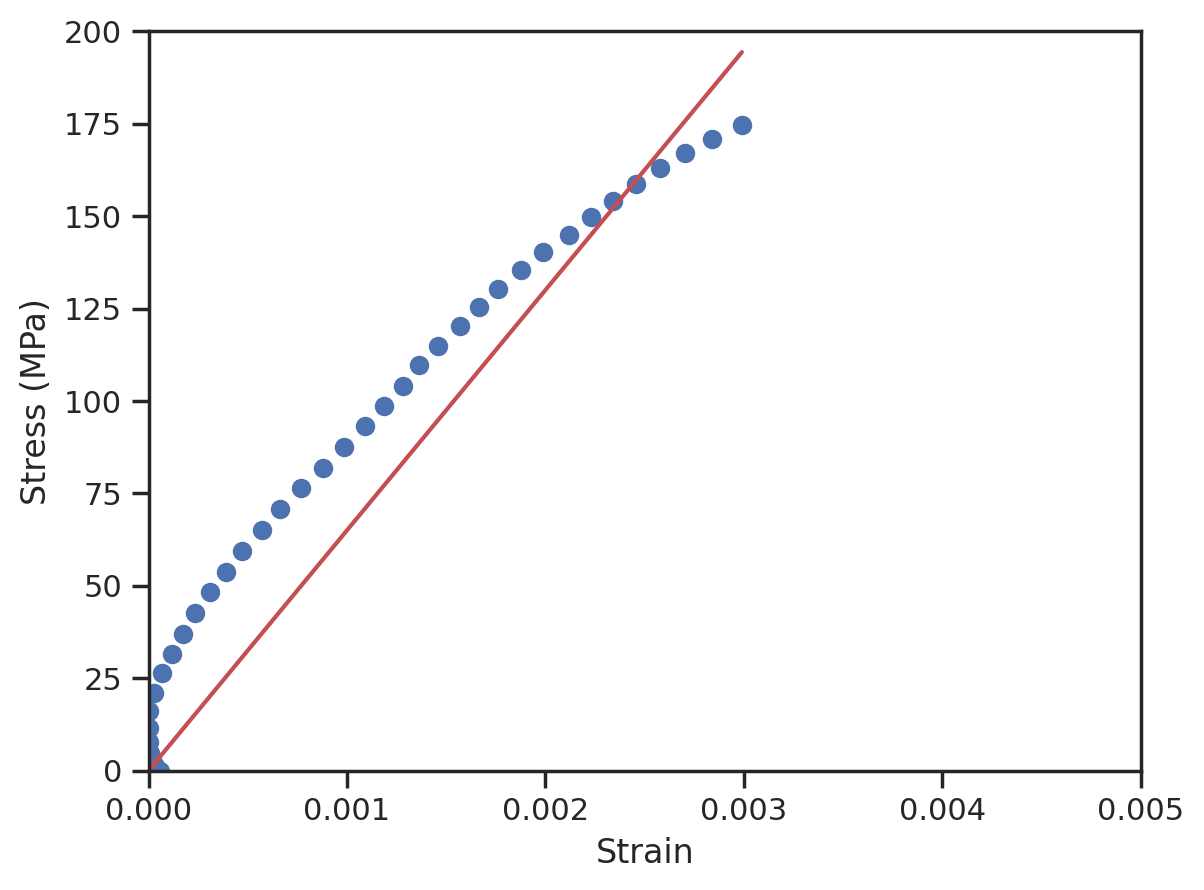

In [39]:
E_guess = 65*1000 # converted to MPa, guess is 65 GPa
predicted_stress = E_guess * clean_linear_df['Strain']
# Code below is for visual inspection plots to check my guess.
plt.plot(clean_linear_df['Strain'], clean_linear_df['Stress_MPa'], 'o')
plt.plot(clean_linear_df['Strain'], predicted_stress, 'r-')
plt.xlim(0, 0.005)
plt.ylim(0, 200)
plt.xlabel('Strain')
plt.ylabel('Stress (MPa)')


+ How does what you found compare to the [wikipedia](https://en.wikipedia.org/wiki/6061_aluminium_alloy) reported Young's modulus for this material? Why do you think yours is lower/higher? You may want to repeat the analysis above for another experiment with lower temperature (say at room temperature).

In [40]:
# Wikipedia reports a value of 68 GPA and my value is 65 GPa. I believe my value is lower possibly due to errors in my shifting, but primarily due to experimental conditions such as temperature.
# This experiment was conducted at 200 degrees Celsius, but the Wikipedia page writes that "The mechanical properties of 6061 greatly depend on the temper, or heat treatment, of the material."
# Hence, like the question suggests, an analysis repeated with an experiment at lower/room temperature would result in a stiffer aluminum and hence a higher Young's Modulus.

Run the following code to convert the notebook to a pdf. Verify that the file path to the notebook is correct.

In [42]:
from google.colab import drive
drive.mount('/content/drive')
!apt-get install inkscape texlive texlive-xetex texlive-latex-extra pandoc --quiet
!pip install pypandoc --quiet
!jupyter nbconvert --to PDF '/content/drive/MyDrive/Colab_Notebooks/homework_05.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists...
Building dependency tree...
Reading state information...
pandoc is already the newest version (2.9.2.1-3ubuntu2).
pandoc set to manually installed.
The following additional packages will be installed:
  aspell aspell-en at-spi2-core dictionaries-common dvisvgm enchant-2 fig2dev
  fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 gawk ghostscript glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gsfonts hunspell-en-us
  imagemagick imagemagick-6-common imagemagick-6.q16 lib2geom1.1.0
  libapache-pom-java libaspell15 libatk-bridge2.0-0 libatk1.0-0 libatk1.0-data
  libatkmm-1.6-1v5 libatspi2.0-0 libboost-filesystem1.74.0 libcairomm-1.0-1v5
  libcdr-0.1-1 libcommons-logging-java libcommons-parent-java libdbus-glib-1-2
  libdjvulibre-text libdjvulibre21 